# What is the most optimal skill to learn for Data Analysts?
Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\pili_\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleanup Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [4]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].dropna(subset=['salary_year_avg']).copy()
df_DA_explode = df_DA.explode('job_skills')
df_DA_explode[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [14]:
df_DA_skills = df_DA_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by="count",ascending=False)
df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'}, inplace=True)
job_count = len(df_DA)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / job_count * 100
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
...,...,...,...
selenium,1,82500.0,0.018345
colocation,1,67500.0,0.018345
cordova,1,113269.5,0.018345


In [24]:
skill_limit = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
power bi,1042,90000.0,19.115759
sas,1006,90000.0,18.455329
word,523,80000.0,9.594570
powerpoint,518,85000.0,9.502844


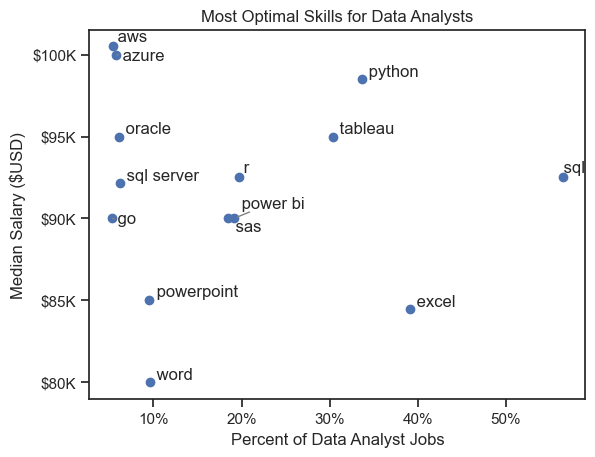

In [27]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [20]:
df_technology = df['job_type_skills'].copy()
# remove duplicates
df_technology = df_technology.drop_duplicates()
# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['spreadsheet',
  'cognos',
  'splunk',
  'ms access',
  'sheets',
  'qlik',
  'excel',
  'outlook',
  'ssrs',
  'ssis',
  'esquisse',
  'nuix',
  'msaccess',
  'sas',
  'looker',
  'word',
  'datarobot',
  'powerbi',
  'sap',
  'alteryx',
  'spss',
  'sharepoint',
  'power bi',
  'tableau',
  'visio',
  'dax',
  'powerpoint',
  'microstrategy'],
 'programming': ['r',
  'pascal',
  'lua',
  'crystal',
  'haskell',
  'java',
  'no-sql',
  'html',
  'golang',
  'cobol',
  'scala',
  'fortran',
  'erlang',
  'perl',
  'rust',
  'swift',
  'f#',
  'python',
  'delphi',
  'c#',
  'matlab',
  'c++',
  'javascript',
  'sass',
  'lisp',
  'dart',
  'sas',
  'vba',
  'julia',
  'kotlin',
  'nosql',
  'ruby',
  'apl',
  'vb.net',
  'elixir',
  'groovy',
  'objective-c',
  'visual basic',
  'bash',
  't-sql',
  'assembly',
  'php',
  'shell',
  'c',
  'go',
  'ocaml',
  'visualbasic',
  'powershell',
  'mongodb',
  'css',
  'typescript',
  'sql',
  'solidity',
  'mongo',
  'cloj

In [21]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,spreadsheet
0,analyst_tools,cognos
0,analyst_tools,splunk
0,analyst_tools,ms access
0,analyst_tools,sheets
...,...,...
9,sync,symphony
9,sync,zoom
9,sync,webex
9,sync,rocketchat


In [22]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,3079,92500.0,56.485049,programming,sql
1,2135,84479.0,39.167125,analyst_tools,excel
2,1838,98500.0,33.718584,programming,python
3,1657,95000.0,30.398092,analyst_tools,tableau
4,1073,92527.5,19.684462,programming,r
...,...,...,...,...,...
176,1,82500.0,0.018345,libraries,selenium
177,1,67500.0,0.018345,cloud,colocation
178,1,113269.5,0.018345,libraries,cordova
179,1,160515.0,0.018345,databases,couchbase


In [25]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

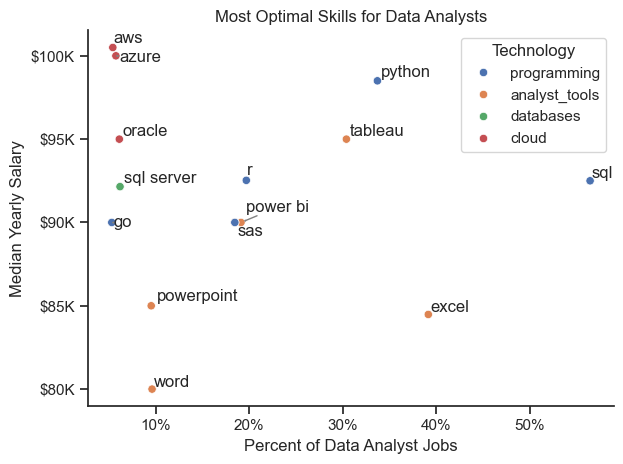

In [28]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()